In [11]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor

In [12]:
df = pd.read_excel('~/git/water/Cost-B.xlsx')
df2 = df.rename({df.columns[0]: 'dirt', df.columns[-1]: 'cost'}, axis=1)
df2.pop(df.columns[1])
df2.head()

,dirt,C,D,cost
0,70.0,17.000000,118.000000,3.132000
1,70.0,114.680482,171.433735,5.263562
2,70.0,287.000000,208.000000,7.152000
3,71.0,17.000000,118.000000,3.032000
4,71.0,123.428571,184.785714,5.670571


In [13]:
# x = df2.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df2 = pd.DataFrame(x_scaled, columns = df2.columns)
# df2.head()

In [14]:
df = df2.copy()
data_cost = df.pop('cost')
label = df.pop('dirt')
df.head()

,C,D
0,17.000000,118.000000
1,114.680482,171.433735
2,287.000000,208.000000
3,17.000000,118.000000
4,123.428571,184.785714


In [15]:

def data_dec(data):
    X_train = data[0]
    X_test = data[1]
    y_train = data[2]
    y_test = data[3]
    return X_train, X_test, y_train, y_test


In [16]:
def eva_metric(y_true, y_pred):
    dic = {'mse':mean_squared_error,
       'mae': mean_absolute_error,
       'r2_score': r2_score}
    
    for i in dic.keys():
        print(i, dic[i](y_true, y_pred))


In [17]:
def lr_curve(results, ylabel, title):
    keys = list(results.keys())
    item = list(results[keys[0]].keys())[0]
    epochs = len(results[keys[0]][item])
    x_axis = range(0, epochs)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(x_axis, results["validation_0"][item], label="Train")
    ax.plot(x_axis, results["validation_1"][item], label="Test")
    ax.legend()
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


In [18]:
# tree square error

##  gbtree, gblinear or dart
def xgb_test(data2XGB, epochs, plot, objective, booster, max_depth):
    data = data2XGB.copy()
    epochs = epochs
    plot = plot
    objective = objective
    booster = booster
    max_depth = max_depth
    X_train, X_test, y_train, y_test = data_dec(data)

    if plot:
        verbose = 1
    else:
        verbose = 0
    model = XGBRegressor(n_estimators = epochs,
                         max_depth = max_depth,
                         objective = objective,
                         tree_method = 'gpu_hist',
                         booster = booster,
                         verbosity = verbose)
#     print(model)
    model.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            eval_metric='mae', verbose =plot)

    y_true = y_test.values
    y_pred = model.predict(X_test)

    eva_metric(y_true, y_pred)

    results = model.evals_result()
    if plot:
        lr_curve(results, 'xgb linear', 'learning curve of gblinear')
    


## 待處理

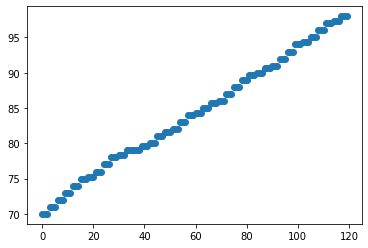

In [19]:
# 資料可能是連續的 要調整
x_axis = np.array(range(len(label)))
plt.scatter(x_axis, label, marker='o')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score




data_ori = train_test_split(df, label, test_size=0.33, random_state=42)



In [21]:
# import pandas as pd
# a = np.empty((100,100))
# a[:] = np.nan

# df = pd.DataFrame(a)
# df.at[0,0] = 1
# df

In [22]:
# dic = {'obj':['reg:squarederror', 'reg:linear'],
#        'booster':['gblinear', 'gbtree', 'dart'],
#        'max_depth':[4, 8, 12]}
# for a in range(len(dic['obj'])):
#     for b in range(len(dic['booster'])):
#         for c in range(len(dic['max_depth'])):
#             print(dic['obj'][a], dic['booster'][b], 'max_depth =', dic['max_depth'][c])
#             xgb_test(data_ori, 500, False, dic['obj'][a], dic['booster'][b], max_depth = dic['max_depth'][c])
#             print('\n')

In [23]:
# dic = {'obj':['reg:squarederror', 'reg:linear'],
#        'booster':['gblinear', 'gbtree', 'dart'],
#        'max_depth':[4, 8, 12]}
# for a in dic['obj']:
#     for b in dic['booster']:
#         for c in dic['max_depth']:
#             print(a, b, 'max_depth =', c)
#             xgb_test(data_ori, 500, False, a, b, max_depth = c)
#             print('\n')
            
# best reg:squarederror gblinear max_depth = 4 
'''
reg:squarederror gblinear max_depth = 4
mse 27.953177039845684
mae 3.9668374506632573
r2_score 0.561017088578295
'''

'\nreg:squarederror gblinear max_depth = 4\nmse 27.953177039845684\nmae 3.9668374506632573\nr2_score 0.561017088578295\n'

In [24]:
X_train, X_test, y_train, y_test = data_dec(data_ori)

In [25]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, 
               coef0=1, verbose = True)

dic = {'svr_model':[svr_rbf, svr_lin]} # poly 跑很久 沒再動

In [26]:
# for model in dic['svr_model']:
#     print(model)
#     model.fit(X_train, y_train)
#     y_true = y_test.values
#     y_pred = model.predict(X_test)
#     eva_metric(y_true, y_pred)
#     print('\n')

In [27]:
def sig_disturb(data2func, percent):
    percent = percent
    y = data2func.copy()
    np.random.seed(1)

    nums = int(len(y)/100*percent)
    if nums == 0:
        nums = 1
    rand = np.random.choice(range(len(y)), nums, replace=False)
    noise = []
    for i in y[rand]:
        a = np.random.normal(loc=i, scale=y.std())
        noise.append(a)
    noise = np.array(noise)
    noise *= 0.01
    y[rand] += noise
    return y, rand

In [28]:
df = pd.read_excel('~/git/water/Cost-B.xlsx')
df2 = df.rename({df.columns[0]: 'dirt', df.columns[-1]: 'cost'}, axis=1)
df2.pop(df.columns[1])

df_disturb = df2.copy()
df_disturb.pop('cost')
label = df_disturb.pop('dirt').values

7.983590114172389
8.089246848400359


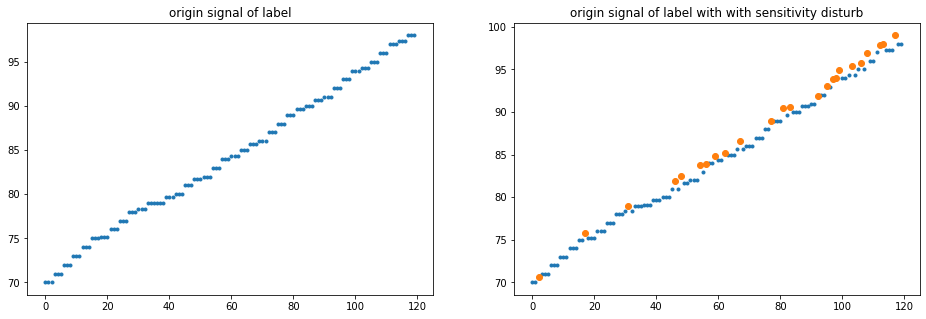

In [30]:
# 雜訊

# add noise on dirt 

print(label.std())
x_axis = np.array(range(len(label)))


# add noise
noise_label, rand= sig_disturb(label, 20)
print(noise_label.std())

# plot
fig=plt.figure(figsize = (16, 5))

fig_place = [1,2]

subplot1 = fig.add_subplot(fig_place[0], fig_place[1], 1)
plt.scatter(x_axis, label, marker='.')
plt.title("origin signal of label", y=1)

subplot2 = fig.add_subplot(fig_place[0], fig_place[1], 2)
plt.title("origin signal of label with with sensitivity disturb")
plt.scatter(x_axis, noise_label, marker='.')
plt.scatter(x_axis[rand], noise_label[rand], marker='o')

In [44]:
data_ori = train_test_split(df_disturb, pd.DataFrame(noise_label), test_size=0.33, random_state=42)



xgb_test(data_ori, 500, False, 'reg:squarederror', 'gblinear', max_depth = 4)

X_train, X_test, y_train, y_test = data_dec(data_ori)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
model = svr_lin
y_train = np.array(y_train)
y_train = np.squeeze(y_train, axis = -1)
print('\ntrain svm with linear')
model.fit(X_train, np.array(y_train))

y_true = y_test.values
y_pred = model.predict(X_test)
eva_metric(y_true, y_pred)


mse 28.786983043863636
mae 3.9716182089280494
r2_score 0.5503887043542598
train svm with linear
mse 28.676376759362665
mae 3.912208512673948
r2_score 0.5521162155285038


In [33]:
data_ori = train_test_split(df_disturb, pd.DataFrame(noise_label), test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = data_dec(data_ori)